<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Fraud-Detection-ML/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraude de Cartões de Crédito 


Neste projeto vamos aplicar Machine learning para Detecção de fraude em Cartões de crédito, um problema muito grande que instituições financeiras e Fintechs tem diariamente, que é identificar se uma transação é uma fraude ou não, é uma tarefa díficil e extremamente delicada. É de extrema importância que as empresas emissoras de cartão de crédito estejam preparadas para este tipo de crime, monitorando constantemente o comportamento dos cartões. 
<hr>

<p align=center>
<img src="https://miro.medium.com/max/1000/0*_6WEDnZubsQfTMlY.png" width="70%"></p>

https://ai-journey.com/wp-content/uploads/2019/06/fraud-EMV-chip-credit-card.jpg

Muitas empresas já tem investido fortemente na Inteligência Artificial, para solucionar problemas financeiros e também criar produtos que minimizam riscos e maximizam lucros. 

Há diversos cases na indústria, sobre a importância que tem a Inteligência Artificial para as empresas que lidam com dados financeiros, que necessitam de escalabilidade e velocidade em aprovações de transações feitas por cartões de crédito, é um desafio muito maior que apenas criar um modelo de Machine learning, mas também permitir um alto desempenho dessas plataformas. 


Com o crescimento da necessidade, de se ter um sistema robusto que consiga lhe dizer se uma compra foi ou não fraude, as oportunidades de se aplicar Inteligência Artificial são cada vez mais necessárias, e vem se tornando imprescindível fazer uso da IA para combater um problema tão grande.

<p align=center>
<img src="https://news.mit.edu/sites/mit.edu.newsoffice/files/styles/news_article_image_top_slideshow/public/images/2018/MIT-Fraud-Detection-PRESS_0.jpg?itok=laiU-5nR" width="60%"></p>


https://www.eastwestbank.com/ReachFurther/NewsArticleStore/519/Credit-card-fraud-top.jpg


<hr>

### Solução 

O objetivo é fazer o uso do Machine learning para antecipar uma fraude, reduzindo posteriormente os números de fraudes que acabam se concretizando e que não são identificadas a tempo, é uma tarefa que vai exigir muitos experimentos, técnicas e algoritmos que melhor performam em cima dos dados que temos, além de o modelo deve ter o mesmo nível de performance quando inserido em produção.  

<hr>
<br>

### *Sobre* o dataset

Os conjuntos de dados contêm transações realizadas com cartões de crédito em setembro de 2013 por portadores de cartões europeus.
Este conjunto de dados <b>apresenta transações que ocorreram em dois dias </b>, nas quais temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) representa 0,172% de todas as transações.

<br>

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a <b> problemas de confidencialidade </b>, não podemos fornecer os recursos originais e mais informações básicas sobre os dados.


Features V1, V2,… V28 são os principais componentes obtidos com o PCA, as únicas features que não foram transformadas com o PCA são 'Time' (Tempo) e 'Amount' (Valor da transação).

<br> 


* A feature 'Time'(Tempo) contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.

*  A feature 'Amount' é o valor da transação. 

* A feature 'Class' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.

<br>
<b>
 0: Transação normal  |
 1: Transação fraudulenta
 </b>

<br>
<hr>

In [1]:
# pacotes 
!pip install shap 
!pip install yellowbrick
!pip install imblearn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from tqdm import tqdm_notebook

from sklearn.metrics import classification_report, recall_score, precision_score ,average_precision_score, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import PrecisionRecallCurve, ConfusionMatrix
from sklearn.model_selection import train_test_split, cross_validate ,KFold, StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
import shap
shap.initjs()

%matplotlib inline 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [3]:
# importando dados 
path = '/content/drive/My Drive/ML_Notebooks/Detecção de Fraude /creditcard.csv' 
credit = pd.read_csv(path)
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('Linhas: {} | Colunas: {} '.format(credit.shape[0], credit.shape[1]))

Linhas: 284807 | Colunas: 31 


In [5]:
# Estatística descritiva
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Normal: 284315 |  Fraude: 492


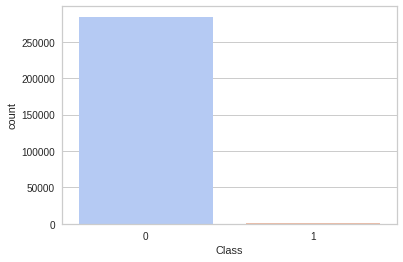

In [6]:
# Classes
sns.countplot(x=credit['Class'], palette='coolwarm')
print('Normal: {} |  Fraude: {}'.format(credit[credit['Class']==0].shape[0] , credit[credit['Class']==1].shape[0]))

De inicío fica claro o desbalanceamento de classes, isso é o que torna a modelagem de Fraude tão delicada, um evento que é raro e que acontece de forma sútil, vamos criar hipóteses para fazer o Feature engineering com esses dados, afim de maximizar as métricas: <b> ROC AUC | Precision | Recall </b>.

Tentar medir a performance do modelo com a Acurácia, seria um engano pois teriamos uma acurácia alta, o que de fato não resolveria o nosso problema, pois o conjunto possiu classes desbalanceadas, vamos focar nestas três métricas listadas acima, que não variam com o desbalanceamento das classes. 

<br>

### Limpeza de dados 

Antes de iniciar uma análise dos dados, vamos limpar os dados, não será necessário apagar transações duplicadas pois faz total sentido, conter transaçõe que são feitas rotineiramente.  

* Missing values 
* Ruídos 
* Tipo de dados

In [0]:
def missing_values(data):

    """ Resumo de dados nulos
        contidos no dataset """

    # total de nulos     
    missing = data.isnull().sum()
    total = missing.sort_values(ascending=True)
    
    # porcentagem 
    percent = (missing / len(data.index ) * 100).round(2).sort_values(ascending=True)

    # concatenação 
    table_missing = pd.concat([total, percent], axis=1, keys=['Números de NA', 'Porcentagem de NA'])

    return table_missing

In [8]:
missing_values(credit)

,Números de NA,Porcentagem de NA
Time,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0
V21,0,0.0
V20,0,0.0


In [9]:
# Tipo de dados
credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<br>
<br>
<hr>

### Análise de dados

Nesta etapa vou tentar identificar alguns padrões, já tenho em mente que vou fazer alguns experimentos tratando os Outliers posteriormente, criar alguns modelos e comparar as aborgadens feitas. 

<hr>
<br>

Vou checar a distribuição de segundos, quero identificar o perído de tempo, em que uma transação fraudulenta é feita, comparando com as transações normais. 

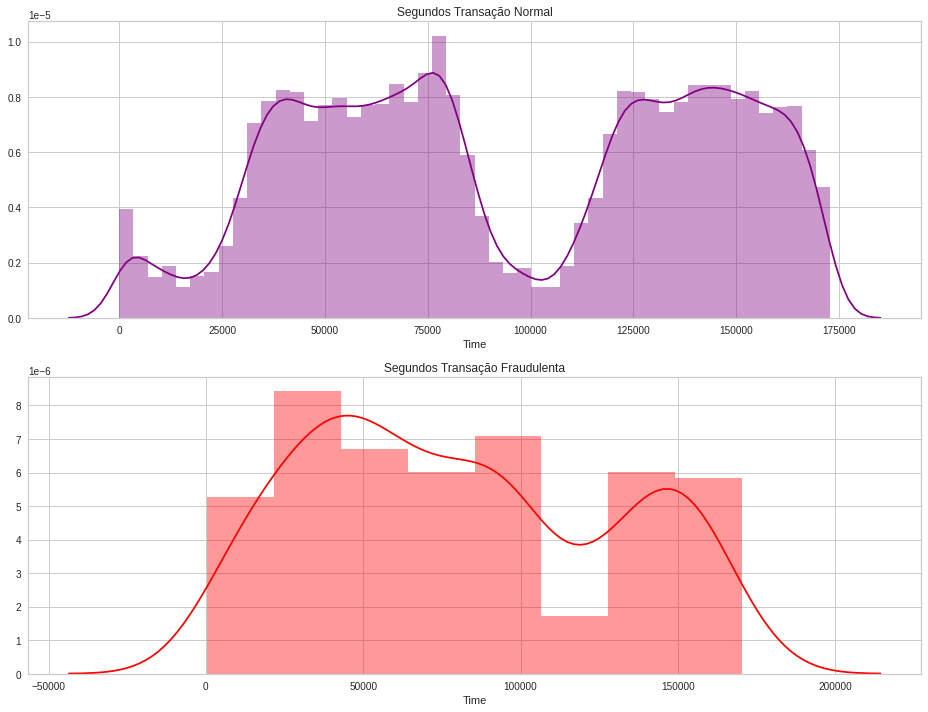

In [10]:
# Comparar Distribuições

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.title('Segundos Transação Normal')
sns.distplot(credit[credit['Class']==0]['Time'], color='purple')

print('\n')
print('\n')

plt.subplot(2,1,2)
plt.title('Segundos Transação Fraudulenta')
sns.distplot(credit[credit['Class']==1]['Time'], color='red')

Olhando para as duas Distribuições, conseguimos ver que o período de uma transação rotulada como Normal, ocorre em uma média de uma forma trivial o que é considerado algo normal, já as transações fraudulentas ocorrem em um período de tempo maior, acada <b> 50.000 segundos </b> uma nova transação fraudulenta é feita(<b> Em dois dias de transações </b>).É muito importante identificar que é uma distribuição muito próxima da <b> Uniforme </b> pois tem uma curva de densidade, quase no mesmo ângulo constante.


Precisamos verificar posteriormente, se ocorre uma transação fraudulenta mais de  uma vez, com os mesmos dados da transação. 

In [11]:
# Fraudes repetidas ?

fraud = credit[credit['Class']==1].loc[credit.duplicated()]
print('Fraudes repetidas: {} '.format(len(fraud)))
print('\n')
fraud

Fraudes repetidas: 19 




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102446,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,7.190306,-9.424844,-0.223293,-12.875494,-0.071918,-6.299961,-12.719207,-3.740176,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,6.309044,-8.576761,0.246747,-11.534046,-0.364265,-5.452495,-11.887570,-3.563585,0.876019,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,8.688308,-17.182918,0.069577,-14.116156,0.959032,-12.375334,-18.716765,-6.522015,3.517955,0.483930,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


<br>
Houve <b> 19 fraudes repetidas </b> neste dois dias, tem casos que houve três fraudes com o mesmo valor, o restante não passa de dois, algo que chama a atenção são os valores baixos das transações que houve um maior número de fraudes, talvez por que o fraudador considera-se o risco de ser pego comparado com o número de tentativas. 

<br>

In [0]:
# cmap
cmap = sns.diverging_palette(120, 40, sep=20, as_cmap=True, center='dark')

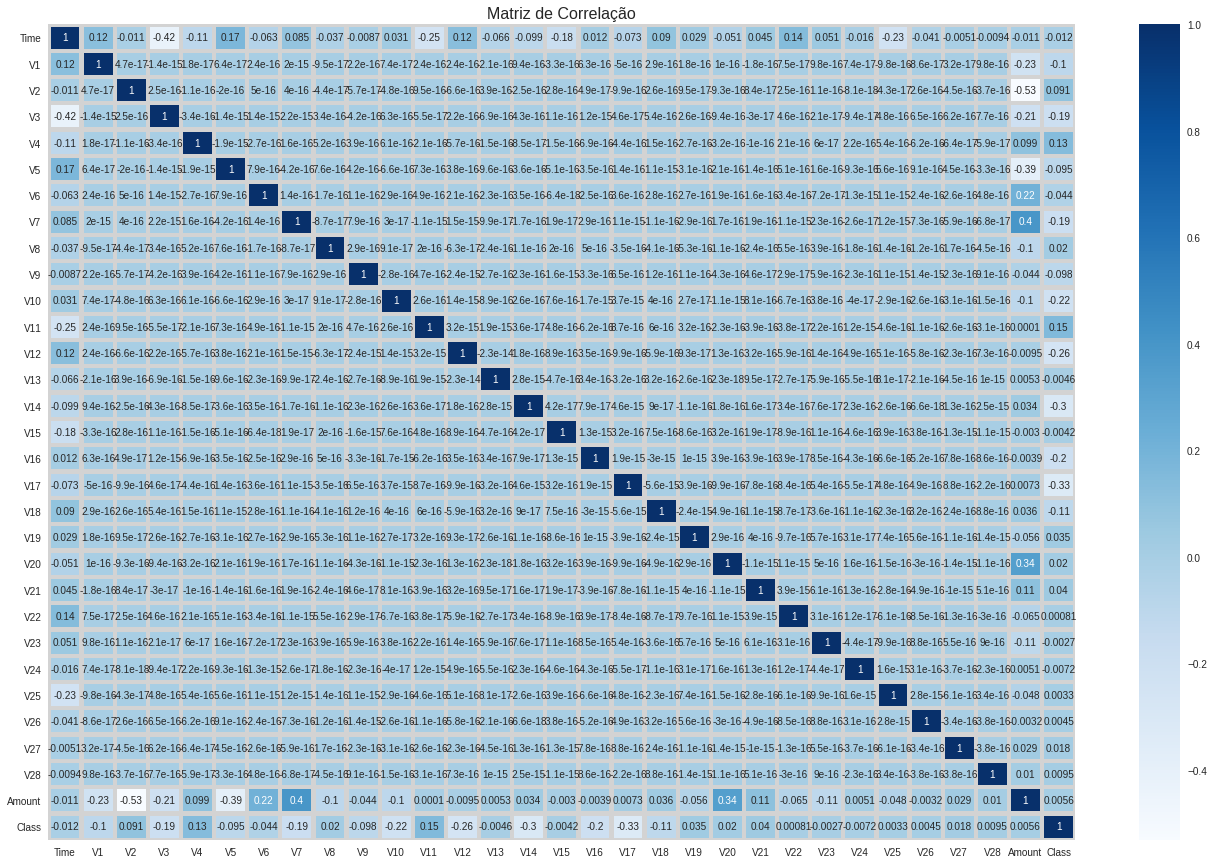

In [13]:
# Correlações
corr = credit.corr(method='pearson')

fig, ax = plt.subplots(figsize=(23,15))

# cmap=Greys

plt.title('Matriz de Correlação', fontsize=16)
print('\n')
correlacao = sns.heatmap(corr, annot=True, cmap='Blues', ax=ax, lw=3.3, linecolor='lightgray')
correlacao

Olhando as correlações de Pearson, conseguimos ver que não há correlações positivasgrandes,apenas algumas features passam de <b> 0.30 de correlação, que são <b> V7 com Amount | V20 com Amount </b>.

(Vamos olhar posteriormente as correlações) 

<br>

#### Distribuições 

Vamos explorar um pouco as distribuições, das features mascaradas <b> (V) </b> para ver como é o comportamento delas, nestes dois dias de transações financeiras. 

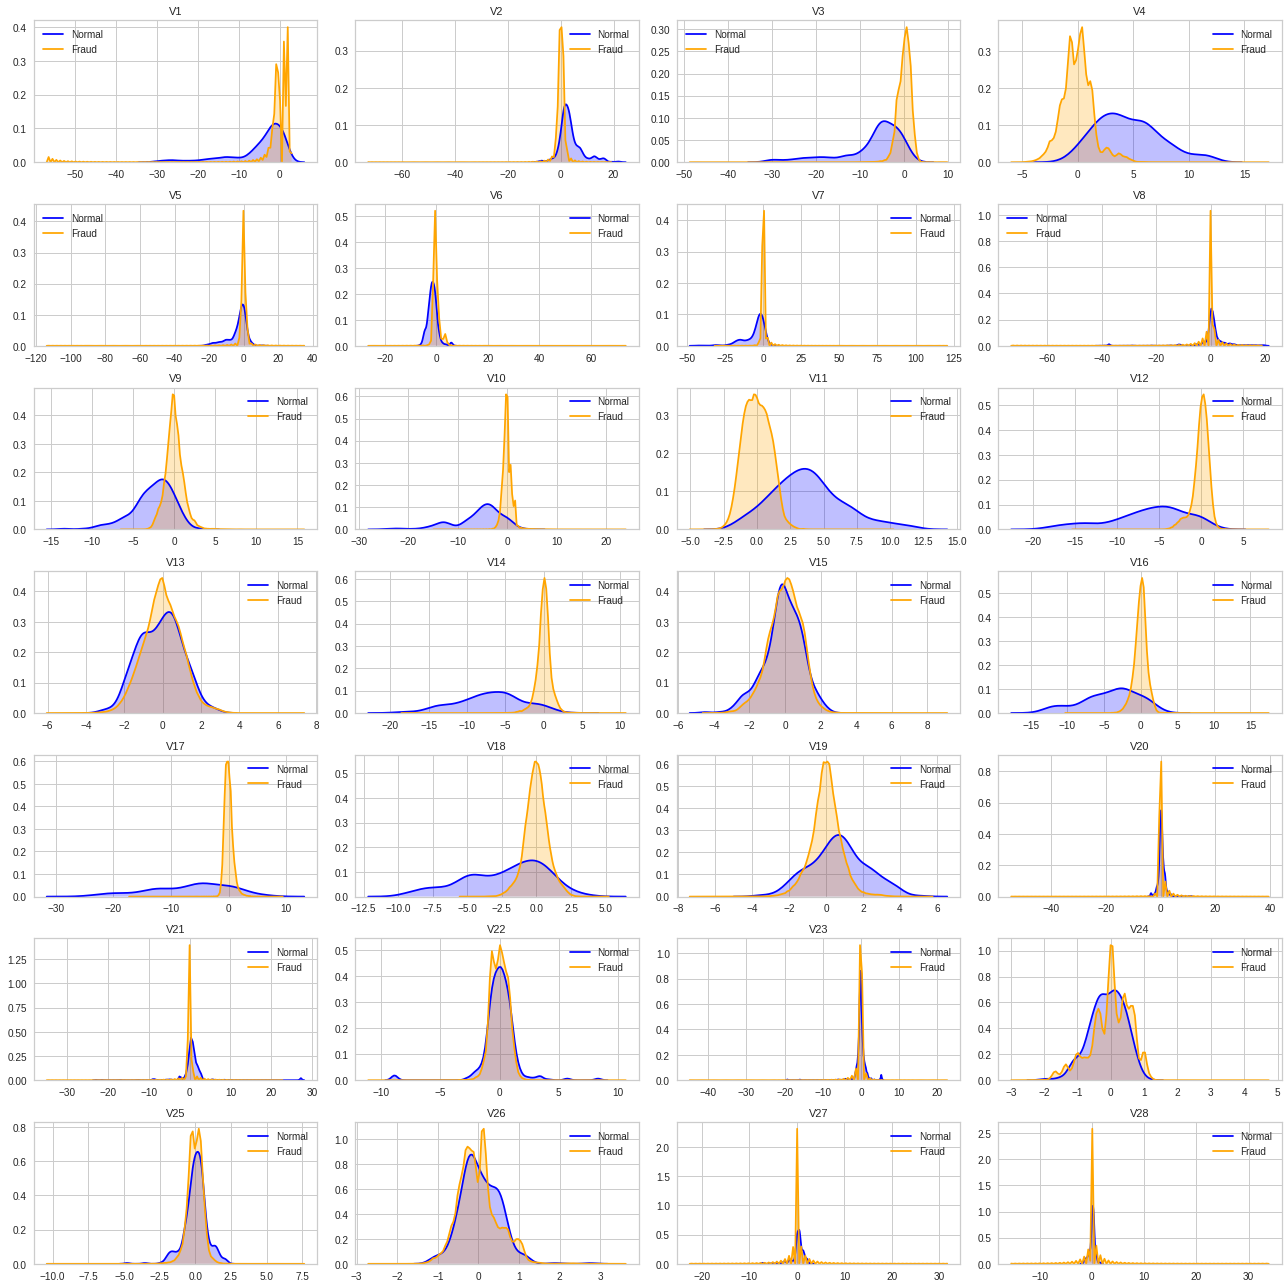

In [14]:
# definindo plot 
cols_names = credit.drop(['Class', 'Amount', 'Time'], axis=1)
idx = 0

# Separando classes
fraud = credit[credit['Class']==1]
normal = credit[credit['Class']==0]

# figura do plot 
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for col in cols_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(fraud[col], label="Normal", color='blue', shade=True)
    sns.kdeplot(normal[col], label="Fraud", color='orange', shade=True)
    plt.title(col, fontsize=11)
    plt.tight_layout()

Todas as distribuições das variáveis que possuem uma "máscara", não sabemos a representação real dessas variáveis pois elas foram ocultadas, mas através da distribuição com a Densidade de kernel, pode ver muito bem as curvas de cada uma, comparando com uma transação normal ou Fraude. 



Fraude: Algumas se aproximam de uma Distribuição Gaussiana, com uma pico maior e uma cauda um bem extensa, possivelmente temos uma variação maior dos dados, nestas features.


In [15]:
# Intervalor de valores das Fraudes 
credit[credit['Class']==1]['Amount'].value_counts

<bound method IndexOpsMixin.value_counts of 541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64>

In [16]:
# Qual o valor médio da transação fraudulenta ? 
print('Valor médio Fraude: {} | Valor médio Normal: {}'.format(credit[credit['Class']==1]['Amount'].mean() , credit[credit['Class']==0]['Amount'].mean()))

Valor médio Fraude: 122.21132113821133 | Valor médio Normal: 88.29102242225574


In [17]:
# Qual o maior valor de fraude ?
print('Maior valor Fraude: {}  | Maior valor Normal: {}'.format(credit[credit['Class']==1]['Amount'].max(), credit[credit['Class']==0]['Amount'].max()))

Maior valor Fraude: 2125.87  | Maior valor Normal: 25691.16


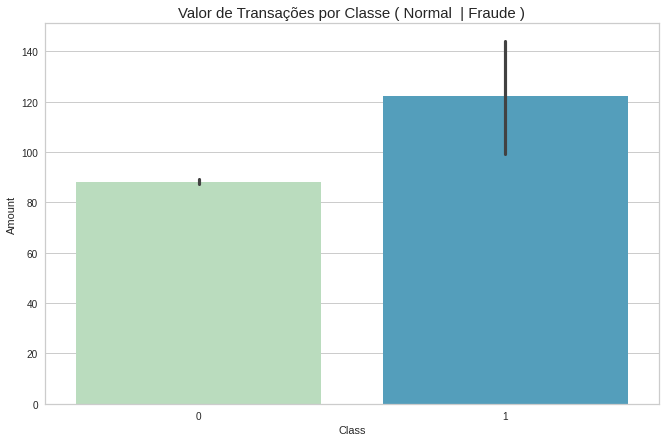

In [18]:
# Valor de transações 

plt.figure(figsize=(11,7))
plt.title('Valor de Transações por Classe ( Normal  | Fraude )', fontsize=15)
sns.barplot(x='Class', y='Amount', data=credit, palette='GnBu')

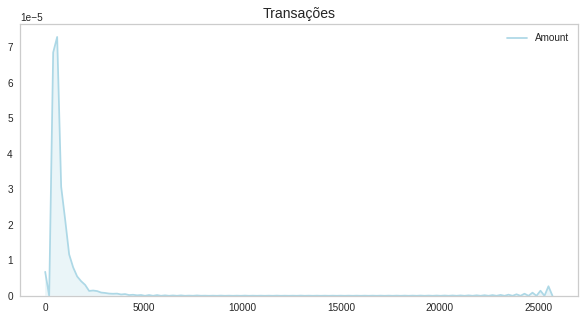

In [19]:
# Distribuição de valores das Transações 
plt.figure(figsize=(10,5))
plt.title('Transações', fontsize=14)
plt.grid(False)
sns.kdeplot(credit['Amount'], color='lightblue', shade=True)

### Resumo de Análise

Após esta etapa de exploração dos dados, conseguimos ter insights bons sobre o conjunto, transações fraudulentas tendem a ter valores menores do que transações normais, fraudes repetidas contém valores menores, outro ponto que descobrimos é que o tempo, entre uma fraude e outra, como os dados nos dizem sobre apenas dois dias de transações, fica díficil inferirmos um valor pontual, em que o fraudador faz uma transferência, mas o tempo possiu uma variação maior que transações normais.

Vamos criar diversos experimentos, em busca de um modelo robusto e que atinja o nosso objetivo. 



<br>
<hr>
<br>

### Baseline 

Vou criar um modelo base, de forma que eu possa comparar os próximos resultados de outros experimentos, com este modelo puro e simples que vamos construir.

In [0]:
# Separando feature | classe 

X = credit.drop('Class', axis=1)
y = credit['Class']

# Treino|Teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


# StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Encoder 
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [21]:
# Modelo Baseline

baseline = LogisticRegression(random_state=42)
baseline.fit(X_train, y_train)
y_baseline = baseline.predict(X_test)

# Probabilidades 
y_proba_baseline = baseline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_baseline))
print('\n')
print('AUC: {}%'.format(roc_auc_score(y_test, y_proba_baseline)))
print('Precision-Recall: {}'.format(average_precision_score(y_test, y_proba_baseline)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



AUC: 0.9783093967187025%
Precision-Recall: 0.788325192946874


<br>

### Baseline

* AUC: 0.97
* AUPRC: 0.78
* Precision: 0.88
* Recall: 0.63

Um modelo baseline puro nos trouxe uma idéia do quanto podemos melhorar o modelo base, para um modelo melhor, vamos criar alguns experimentos para obter uma performance melhor. 

<hr>
<br>

### Experimentação 

Vamos testar alguns algoritmos como: 

* Random Forest 
* SVM 

Vamos aplica-los separadamente, mas vamos tentar outras alternativas na modelagem, aplicar técnicas de balanceamento dos dados, e também validar nossos modelos apartir de Cross validation. 

<br>
<hr>

Vamos aplicar primeiro uma Random Forest, combinada com uma técnica de OverSampling que basicamente vai, criar dados sintéticos na class minonitária que é a classe fraude, vamos testar esta abordagem e ver a performance do modelo. Assim por diante, vamos aplicar UnderSampling também para medir a performance em uma outra abordagem. 


<p align=center>
<img src="https://blog.strands.com/hs-fs/hubfs/Screenshot%202019-07-18%20at%2014.15.15.png?width=600&name=Screenshot%202019-07-18%20at%2014.15.15.png" width="60%"></p>


<br>
<br>

### Random Forest 

Vamos construir um modelo Random Forest como <b> 200 árvores </b> combinado com a técnica de OverSampling <b> SMOTE </b> e ver os resultados das métricas que estamos buscando otimizar que são: 

* AUC 
* Precision
* Recall 
* AUPRC  

<hr>

In [22]:
X = credit.drop('Class', axis=1)
y = credit['Class']

# Validação 
KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold = 0
for train_index, test_index in KFold.split(X,y):
      fold += 1 
      print('Fold: ', fold)
      print('Treino: ',train_index.shape[0])
      print('Teste: ', test_index[0])

      # Split
      X = credit.drop('Class', axis=1)
      y = credit['Class']

      # OverSampling SMOTE 
      smote = SMOTE(random_state=42)
      X, y = smote.fit_sample(X, y)
      print('Normal: {}  |  Fraude: {}'.format(np.bincount(y)[0], np.bincount(y)[1]))

      # separando dados 
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index] 

      
      # pré-processamento 
      scaler = QuantileTransformer(random_state=42)
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      # Criando modelo 
      forest = RandomForestClassifier(n_estimators=200, max_depth=13, min_samples_split=9,
                                    random_state=42)
      forest.fit(X_train, y_train)
      y_pred_forest = forest.predict(X_test)
      y_proba_forest = forest.predict_proba(X_test)[:,1]


      # Métricas
      print('\n')
      print(classification_report(y_test, y_pred_forest))
      print('--------------'*5)
      print('\n')
      auc_forest = roc_auc_score(y_test, y_proba_forest)
      precision_forest = precision_score(y_test, y_pred_forest)
      recall_forest = recall_score(y_test, y_pred_forest)
      auprc_forest = average_precision_score(y_test, y_proba_forest)

Fold:  1
Treino:  227845
Teste:  5
Normal: 284315  |  Fraude: 284315


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.77      0.83        99

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------


Fold:  2
Treino:  227845
Teste:  1
Normal: 284315  |  Fraude: 284315


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.79      0.88        99

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------


Fold:  3
Treino:  227846
Teste:  0
Normal: 284315  |  Frau

Random Forest


AUC:  0.972695203329736
Precision:  0.927710843373494
Recall:  0.7857142857142857
Precision-Recall:  0.8257579754337055






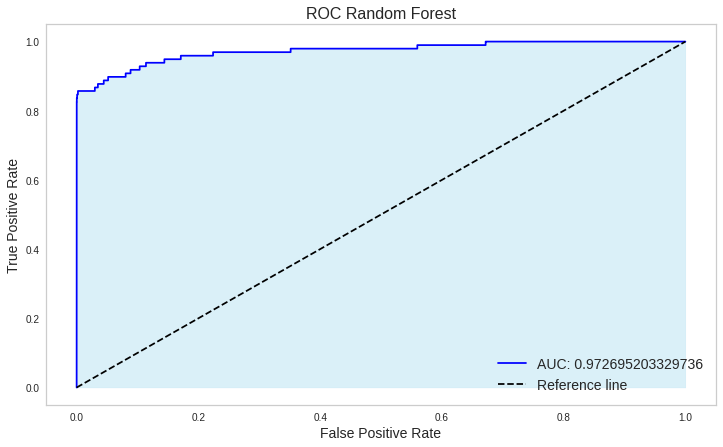

In [23]:
# Validação Random Forest 
print('Random Forest')
print('\n')

print('AUC: ', np.mean(auc_forest))
print('Precision: ', np.mean(precision_forest))
print('Recall: ', np.mean(recall_forest))
print('Precision-Recall: ', np.mean(auprc_forest))


print('\n')
print('\n')

# Curva ROC random forest 
auc_forest = np.mean(auc_forest)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_proba_forest)

# plot 
plt.figure(figsize=(12,7))
plt.plot(fpr_forest, tpr_forest, color='blue', label='AUC: {}'.format(auc_forest))
plt.fill_between(fpr_forest, tpr_forest, color='skyblue', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Random Forest', fontsize=16)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

0.8257579754337055

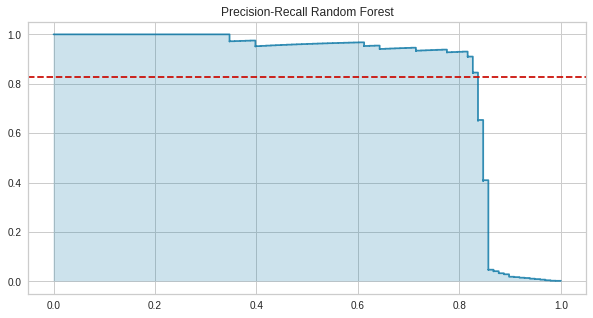

In [24]:
# Precision-Recall Random Forest 

plt.figure(figsize=(10,5))
plt.title('Precision-Recall Random Forest')
viz = PrecisionRecallCurve(forest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)


### Resumo Random Forest 

O modelo com <b> 200 árvores </b>, combinado com um método de pré-processamento chamado <b> QuantileTransformer </b> que tem o objetivo, de reduzir o impacto de posssíveis Outliers nos dados, ele vai aproximar a distriuição das features através do IQR (intervalo interquartil), também fiz uso da técnica <b> SMOTE </b> que cria dados sintéticos, da classe minonitária igualando com a classe majoritária. 

<br>

Em resumo o modelo não alcançou um resultado satisfatório, o AUC do modelo ficou alto, na validação o resultado foi de <b> 97%  </b>, mas as outras métricas não atingiram um valor esperado. Precision ficou alta mas o Recall não chegou a subir muito comparado a baseline, o trade-off Precision-Recall é a métrica principal em nossa avaliação, e díficil de otimizar, pois queremos um modelo que consiga separar bem uma fraude de uma transação normal, e também que identifique bem uma fraude quando ela realmente ocorrer.

<hr>
<br>
<hr>
<br>

### SVM 

Vamos aplicar o SVM que é outro algoritmo robusto, vamos combinar nele um outro pré-processamento nos dados, vamos utilizar o UnderSampling agora, onde vamos diminuir a classe majoritária, na tentativa de igualar as classes.

SVM tem a função de kernel, que permite construir um Hiperplano que melhor se adeque aos dados. 

<br>
<hr>

In [25]:
# SVM 
X = credit.drop('Class', axis=1)
y = credit['Class']

# UnderSampling  
under = NearMiss()
X, y = under.fit_sample(X, y)


# Validação 
KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold = 0
for train_index, test_index in KFold.split(X,y):
      fold += 1 
      print('Fold: ', fold)
      print('Treino: ', train_index.shape[0])
      print('Teste: ', test_index[0])

      # Classe balanceadas
      print('Normal: {}  |  Fraude {}'.format(np.bincount(y)[0], np.bincount(y)[1]))

      # separando dados 
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index] 

      
      # pré-processamento 
      scaler = RobustScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      # Criando modelo 
      svm = SVC(C=1.0, gamma=0.5, random_state=42, probability=True)
      svm.fit(X_train, y_train)
      y_pred_svm = svm.predict(X_test)
      y_proba_svm = svm.predict_proba(X_test)[:,1]


      # Métricas
      print('\n')
      print(classification_report(y_test, y_pred_svm))
      print('-------------'*5)
      print('\n')
      auc_svm = roc_auc_score(y_test, y_proba_svm)
      precision_svm = precision_score(y_test, y_pred_svm)
      recall_svm = recall_score(y_test, y_pred_svm)
      auprc_svm = average_precision_score(y_test, y_proba_svm)

Fold:  1
Treino:  787
Teste:  0
Normal: 492  |  Fraude 492


              precision    recall  f1-score   support

           0       0.99      0.76      0.86        99
           1       0.80      0.99      0.89        98

    accuracy                           0.87       197
   macro avg       0.89      0.87      0.87       197
weighted avg       0.89      0.87      0.87       197

-----------------------------------------------------------------


Fold:  2
Treino:  787
Teste:  5
Normal: 492  |  Fraude 492


              precision    recall  f1-score   support

           0       0.97      0.65      0.78        99
           1       0.73      0.98      0.84        98

    accuracy                           0.81       197
   macro avg       0.85      0.81      0.81       197
weighted avg       0.85      0.81      0.81       197

-----------------------------------------------------------------


Fold:  3
Treino:  787
Teste:  2
Normal: 492  |  Fraude 492


              precision    

SVM


AUC:  0.9610578925447729
Precision:  0.8173913043478261
Recall:  0.9591836734693877
Precision-Recall:  0.9652268787898853






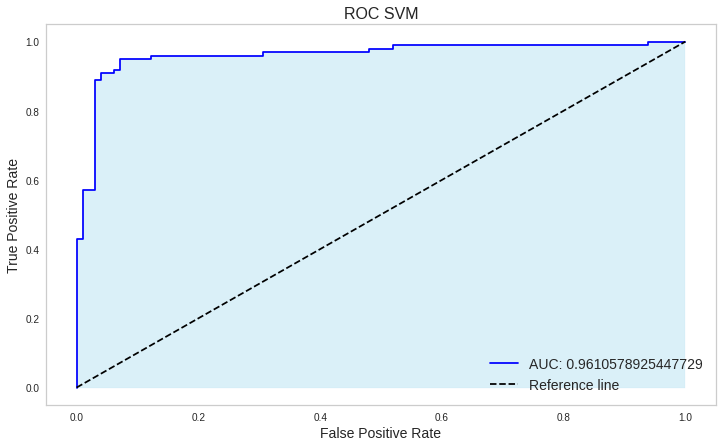

In [26]:
# Validação SVM 
print('SVM')
print('\n')

print('AUC: ', np.mean(auc_svm))
print('Precision: ', np.mean(precision_svm))
print('Recall: ', np.mean(recall_svm))
print('Precision-Recall: ', np.mean(auprc_svm))


print('\n')
print('\n')

# Curva ROC random forest 
auc_svm = np.mean(auc_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm)

# plot 
plt.figure(figsize=(12,7))
plt.plot(fpr_svm, tpr_svm, color='blue', label='AUC: {}'.format(auc_svm))
plt.fill_between(fpr_svm, tpr_svm, color='skyblue', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC SVM', fontsize=16)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

0.9652268787898853

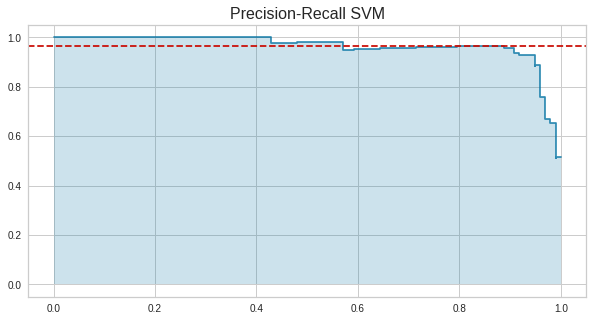

In [27]:
# Precision-Recall SVM 

plt.figure(figsize=(10,5))
plt.title('Precision-Recall SVM', fontsize=16)
viz = PrecisionRecallCurve(svm)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)

<hr>
<br>

### Resumo SVM 

Com SVM conseguimos melhorar nosso Recall para: <b> 95% </b>, consequentemente nossa Precision caiu, mas em geral o desempenho deste modelo foi superior a Random Forest, AUC foi a única com um descréscimom, Precision-Recall: <b> 96% </b> foi um resultado muito bom. Combinando o SVM com  a técnica de UnderSampling obtivemos resultados bons neste experimento.

Vou criar mais dois modelos utilizando dois algoritmos de <b> Gradient Boosting </b> para ver se conseguimos, resultados ainda melhores que o SVM. 


<hr>
<br>
<hr>
<br>
<br>

### XGboost 

O XGBoost é um algoritmo de Machine learning, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting.

Em problemas de previsão envolvendo dados não estruturados, como imagens, textos e vídeos, as redes neurais artificiais tendem a superar todos os outros algoritmos ou frameworks.

No entanto, quando se trata de dados estruturados/tabulares, algoritmos baseados em árvore de decisão são considerados os melhores da sua classe no momento.

Vamos criar um modelo com o XGBoost. 


(Em um próximo projeto, vou explicar o funcionamento do XGboost por inteiro) 

<p align=center>
<img src="https://pythonawesome.com/content/images/2018/06/xgboost.png" width="60%"></p>



<br>
<hr>

### XGboost + SMOTE   

Vamos aplicar agora a técnica de OverSampling com o XGboost, vou aderir um experimento com o <b> SMOTE </b> que será responsável por aplicar o OverSampling, vou igualar as classes maximizando as proporções da classe 1.

<br>

In [28]:
X = credit.drop('Class', axis=1)
y = credit['Class']


# Validação 
KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
precision_xgboost = []
recall_xgboost = []
auc_xgboost = []
precision_recall_xgboost = []


fold = 0
for train_index, test_index in KFold.split(X,y):
      fold += 1 
      print('Fold: ', fold)
      print('Treino: ',train_index.shape[0])
      print('Teste: ', test_index[0])

      # OverSampling SMOTE 
      smt = SMOTE(random_state=42)
      X, y = smt.fit_sample(X, y)
      print('Normal: {}  |  Fraude: {}'.format(np.bincount(y)[0], np.bincount(y)[1]))

      # separando dados 
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index] 

      
      # pré-processamento 
      scaler = QuantileTransformer()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      # XGboost 
      xgb = XGBClassifier(n_estimators=300, max_delta_step=1 ,eval_metric='aucpr', 
                          cpu_history='gpu', random_state=42)
      xgb.fit(X_train, y_train)
      y_pred = xgb.predict(X_test)
  

      # Métricas
      precision_recall_xgboost = average_precision_score(y_test, y_pred)
      precision_xgboost = precision_score(y_test, y_pred)
      recall_xgboost = recall_score(y_test, y_pred)
      auc_xgboost  = roc_auc_score(y_test, y_pred)
      print('Precision-Recall: ', average_precision_score(y_test, y_pred))
      print('\n')
      print('\n')



# Validação final  
print('Precision-Recall: ', np.mean(precision_recall_xgboost))
print('Recall: ', np.mean(recall_xgboost))
print('Precision: ', np.mean(precision_xgboost))
print('AUC: ', np.mean(auc_xgboost))

Fold:  1
Treino:  227845
Teste:  5
Normal: 284315  |  Fraude: 284315
Precision-Recall:  0.6933259898398831




Fold:  2
Treino:  227845
Teste:  1
Normal: 284315  |  Fraude: 284315
Precision-Recall:  0.8088602531388951




Fold:  3
Treino:  227846
Teste:  0
Normal: 284315  |  Fraude: 284315
Precision-Recall:  0.7777698443664308




Fold:  4
Treino:  227846
Teste:  14
Normal: 284315  |  Fraude: 284315
Precision-Recall:  0.7472822535496997




Fold:  5
Treino:  227846
Teste:  11
Normal: 284315  |  Fraude: 284315
Precision-Recall:  0.7139331019491699




Precision-Recall:  0.7139331019491699
Recall:  0.7959183673469388
Precision:  0.896551724137931
AUC:  0.8978800460971896


XGboost


AUC:  0.8978800460971896
Precision:  0.896551724137931
Recall:  0.7959183673469388
Precision-Recall:  0.7139331019491699






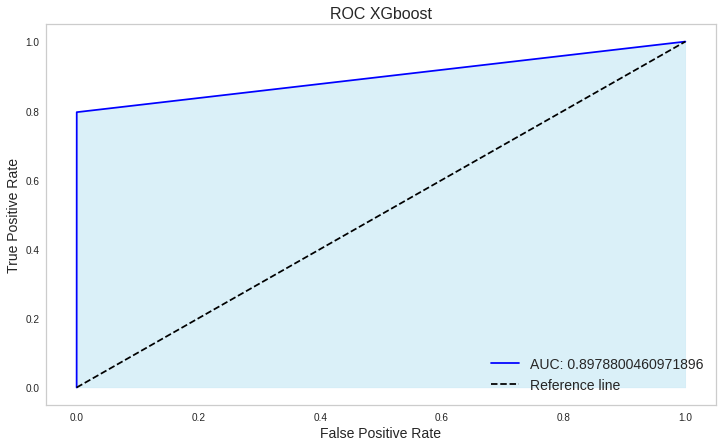

In [29]:
# Validação XGboost + SMOTE
print('XGboost')
print('\n')

print('AUC: ', np.mean(auc_xgboost))
print('Precision: ', np.mean(precision_xgboost))
print('Recall: ', np.mean(recall_xgboost))
print('Precision-Recall: ', np.mean(precision_recall_xgboost))


print('\n')
print('\n')

# Curva ROC random forest 
roc_auc_xgboost = np.mean(auc_xgboost)
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred)

# plot 
plt.figure(figsize=(12,7))
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', label='AUC: {}'.format(roc_auc_xgboost))
plt.fill_between(fpr_xgboost, tpr_xgboost, color='skyblue', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC XGboost', fontsize=16)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

0.8465121764904655

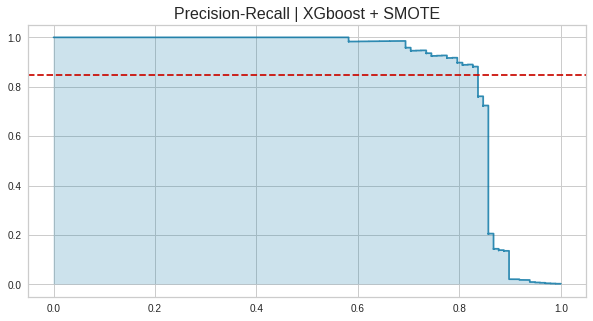

In [30]:
# Precision-Recall XGboost + SMOTE 

plt.figure(figsize=(10,5))
plt.title('Precision-Recall | XGboost + SMOTE', fontsize=16)
viz = PrecisionRecallCurve(XGBClassifier(n_estimators=300, max_delta_step=1 ,eval_metric='aucpr', 
                          cpu_history='gpu', random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)

<hr>
<br>

### XGboost + NearMiss 

Vamos combinar o XGboost com a técnica de UnderSampling NearMiss, vou utilizar os mesmos parâmetros que o modelo anterior, neste caso vamos minimizar a classe majoritária a uma prorção igual nossa classe minonitária. 

In [31]:
X = credit.drop('Class', axis=1)
y = credit['Class']

# UnderSampling NearMiss
under = NearMiss(random_state=42)
X,y = under.fit_sample(X, y)

# Validação 
KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
fold = 0
for train_index, test_index in KFold.split(X,y):
      fold += 1 
      print('Fold: ', fold)
      print('Treino: ',train_index.shape[0])
      print('Teste: ', test_index[0])

      # Classes balanceadas 
      print('Normal: {} | Fraude: {}'.format(np.bincount(y)[0], np.bincount(y)[1]))


      # separando dados 
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index] 

      
      # pré-processamento 
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)


      # Encoder 
      encoder = LabelEncoder()
      y_train = encoder.fit_transform(y_train)
      y_test = encoder.transform(y_test)


      # XGboost 
      xgb = XGBClassifier(n_estimators=300, max_delta_step=1 ,eval_metric='aucpr', 
                          cpu_history='gpu', random_state=42)
      xgb.fit(X_train, y_train)
      y_pred = xgb.predict(X_test)

    # Métricas
      precision_recall_xgboost = average_precision_score(y_test, y_pred)
      precision_xgboost = precision_score(y_test, y_pred)
      recall_xgboost = recall_score(y_test, y_pred)
      auc_xgboost  = roc_auc_score(y_test, y_pred)
      print('Precision-Recall: ', average_precision_score(y_test, y_pred))
      print('\n')
      print('\n')



# Validação final  
print('Precision-Recall: ', np.mean(precision_recall_xgboost))
print('Recall: ', np.mean(recall_xgboost))
print('Precision: ', np.mean(precision_xgboost))
print('AUC: ', np.mean(auc_xgboost))

Fold:  1
Treino:  787
Teste:  0
Normal: 492 | Fraude: 492
Precision-Recall:  0.9697524508612105




Fold:  2
Treino:  787
Teste:  5
Normal: 492 | Fraude: 492
Precision-Recall:  0.9693915717502604




Fold:  3
Treino:  787
Teste:  2
Normal: 492 | Fraude: 492
Precision-Recall:  0.9455098369745918




Fold:  4
Treino:  787
Teste:  9
Normal: 492 | Fraude: 492
Precision-Recall:  0.9550945153737032




Fold:  5
Treino:  788
Teste:  8
Normal: 492 | Fraude: 492
Precision-Recall:  0.9490917246019288




Precision-Recall:  0.9490917246019288
Recall:  0.9183673469387755
Precision:  0.989010989010989
AUC:  0.9540816326530612


<hr>
<br>
<hr>
<br>

XGboost


AUC:  0.9540816326530612
Precision:  0.989010989010989
Recall:  0.9183673469387755
Precision-Recall:  0.9490917246019288






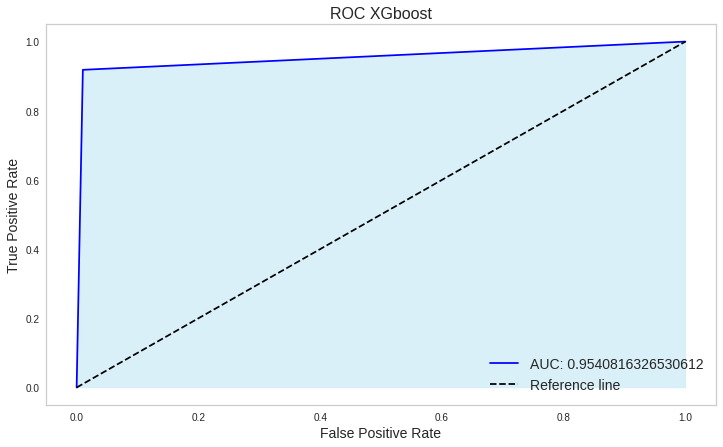

In [32]:
# Validação XGboost + NearMiss  
print('XGboost')
print('\n')

print('AUC: ', np.mean(auc_xgboost))
print('Precision: ', np.mean(precision_xgboost))
print('Recall: ', np.mean(recall_xgboost))
print('Precision-Recall: ', np.mean(precision_recall_xgboost))


print('\n')
print('\n')

# Curva ROC random forest 
roc_auc_xgboost = np.mean(auc_xgboost)
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred)

# plot 
plt.figure(figsize=(12,7))
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', label='AUC: {}'.format(roc_auc_xgboost))
plt.fill_between(fpr_xgboost, tpr_xgboost, color='skyblue', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC XGboost', fontsize=16)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

0.9892415686128232

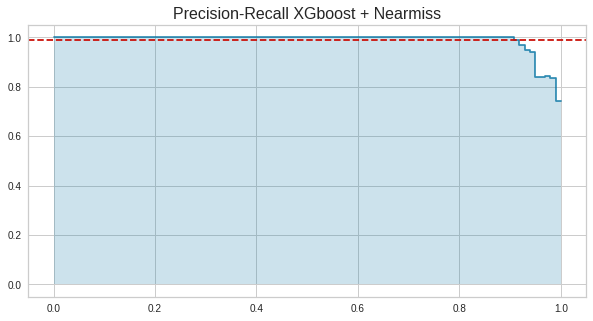

In [33]:
# Precision-Recall XGboost + NearMiss 

plt.figure(figsize=(10,5))
plt.title('Precision-Recall XGboost + Nearmiss', fontsize=16)
viz = PrecisionRecallCurve(XGBClassifier(n_estimators=300, max_delta_step=1 ,eval_metric='aucpr', 
                          cpu_history='gpu', random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)

<hr>
<br>

### XGboost Resumo 

A melhor combinação até agora foi <b> XGboost + UnderSampling(NearMiss) </b> conseguimos obter valores muito bons, reduzimos nossa classe majoritária, balanceando as classes o algoritmo conseguiu generalizar melhor os dados, com uma AUPRC de <b> 94% </b> na validação, foi um resultado excelente do modelo, os dados sintéticos que o SMOTE acaba gerando, acaba não fazendo muito sentido para o algoritmo, pois são "dados repetidos" e que mostra, pouquíssima generalização de Fraudes. 



<br>
<hr>
<br>
<hr>
<br>

### LightGBM 


<hr>
<br>

<p align=center>
<img src="https://blog.mockun.com/content/images/2018/09/LightGBM.png" width="60%"></p>

##### em construção................

In [0]:
# Matriz de Confusão 
#plt.figure(figsize=(10,5))

#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='BuPu')

In [0]:
#cm = ConfusionMatrix(xgb, classes=['Normal', 'Fraude'], cmap='BuPu', fontsize=15 )
#cm.score(X_test, y_test)
#cm.show()